In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Tras la evaluación de los usuarios, evaluamos el modelo del KNN

In [ ]:
predicciones = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Respuestas/Respuesta_viviendas.csv',
    sep=";")

In [5]:
predicciones.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización'],
      dtype='object')

In [7]:
predicciones['num_inmueble'] = predicciones.groupby('correo_electronico').cumcount() + 1
predicciones['num_inmueble'] = predicciones['num_inmueble'].apply(lambda x: f"Evaluación de viviendas [Vivienda {x}]")

In [ ]:
respuestas = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Respuestas/Evaluación de viviendas (Respuestas) - Respuestas de formulario 1_csv.csv')

In [12]:
respuestas.rename(columns={'9': 'fecha_respuesta'}, inplace = True)

In [ ]:
# Preparamos el dataset de respuestas canviando las columnas a filas 

respuestas_melted = respuestas.melt(id_vars=['Dirección de correo electrónico', 'fecha_respuesta'], var_name='Inmueble', value_name='Valoración')
respuestas_melted

,Dirección de correo electrónico,fecha_respuesta,Inmueble,Valoración
0,gAAAAABnti4JL0A6RHhB6Ygm8fZ45f25Ac5fxI95qj7w0F...,6/2/2025 20:47:51,Evaluación de viviendas [Vivienda 1],4
1,gAAAAABnti4J0peFP5ss-lZTIlS_Kvii1w8eYfe6p5TyIE...,6/2/2025 21:51:05,Evaluación de viviendas [Vivienda 1],10
2,gAAAAABnti4JFXIaT3nh9fqADr8Kep0Ss5VMQYY7lzbCnc...,8/2/2025 11:32:11,Evaluación de viviendas [Vivienda 1],1
3,gAAAAABnti4JFbi7vHsqwQQRMKNOj7d8VljlKjRk1m84K3...,9/2/2025 16:08:08,Evaluación de viviendas [Vivienda 1],10
4,gAAAAABnti4JhOiUn-J57l6mfbNr46rBefIgCDhQ3I5Esx...,9/2/2025 16:21:05,Evaluación de viviendas [Vivienda 1],7
...,...,...,...,...
195,gAAAAABnti4JxXePjNpgoMQ1B7l_uCUPUVRAlV366QmTw0...,16/2/2025 17:12:38,Evaluación de viviendas [Vivienda 10],8
196,gAAAAABnti4Jr2mIHq0eDzXNSs8wY5uGMpZduuzrxgvQ1E...,16/2/2025 17:14:19,Evaluación de viviendas [Vivienda 10],3
197,gAAAAABnti4Jx_HKE07SSLCA6JeRPyCpmXIz-lJRMcjHEB...,16/2/2025 17:18:10,Evaluación de viviendas [Vivienda 10],3
198,gAAAAABnti4Jm9lt9VaOaLsQvJKUonzMTHe4o1eVrYHmvM...,16/2/2025 20:16:14,Evaluación de viviendas [Vivienda 10],9


In [14]:
predicciones.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización', 'num_inmueble'],
      dtype='object')

In [ ]:
# Juntamos el dataset enviado a los usuarios con las respuestas de los usuarios
valoracion = predicciones.merge(respuestas_melted,
                                left_on=['correo_electronico', 'num_inmueble'],
                                right_on=['Dirección de correo electrónico', 'Inmueble'],
                                how='left')


In [16]:
valoracion.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización', 'num_inmueble',
       'Dirección de correo electrónico', 'fecha_respuesta', 'Inmueble',
       'Valoración'],
      dtype='object')

In [17]:
valoracion[['origen_vivienda', 'Valoración','Dirección de correo electrónico' ]][(valoracion['Valoración'].notna()) & (valoracion['Valoración']<=5) & (valoracion['origen_vivienda']=='modelo_precio')]

,origen_vivienda,Valoración,Dirección de correo electrónico


In [18]:
for e in valoracion['Dirección de correo electrónico'].unique():
    filtro = valoracion[valoracion['Dirección de correo electrónico'] == e]
    pivot_table = filtro.pivot_table(
        values='Valoración', 
        index='origen_vivienda',
        columns = ['Dirección de correo electrónico'],
        aggfunc='mean'  
    )
    print(f"Para {e} los valores son: {pivot_table}")



Para nan los valores son: Empty DataFrame
Columns: []
Index: []


In [19]:
valoracion.pivot_table(
    values='Valoración',
    index='origen_vivienda',
    columns=['Dirección de correo electrónico'],
    aggfunc='mean',
    margins=True,
    margins_name='total'
).T.reset_index().sort_values(by = 'Dirección de correo electrónico', ascending=True)


origen_vivienda,Dirección de correo electrónico


/tmp/ipykernel_54320/2821714927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=valores.index, y=valores.values, palette="viridis", width=0.5)


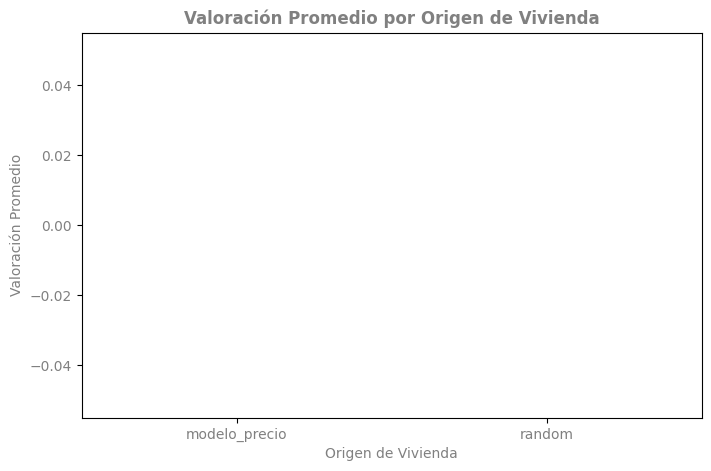

In [ ]:
# Calculamos la media de las valoraciones por origen de vivienda

valores = valoracion.groupby('origen_vivienda')['Valoración'].mean()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=valores.index, y=valores.values, palette="viridis", width=0.5)  

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray') 

plt.xlabel('Origen de Vivienda',color='gray')
plt.ylabel('Valoración Promedio', color='gray')
plt.title('Valoración Promedio por Origen de Vivienda', fontweight='bold',color='gray') 

plt.xticks( color='gray')
plt.yticks(color='gray') 
plt.show()


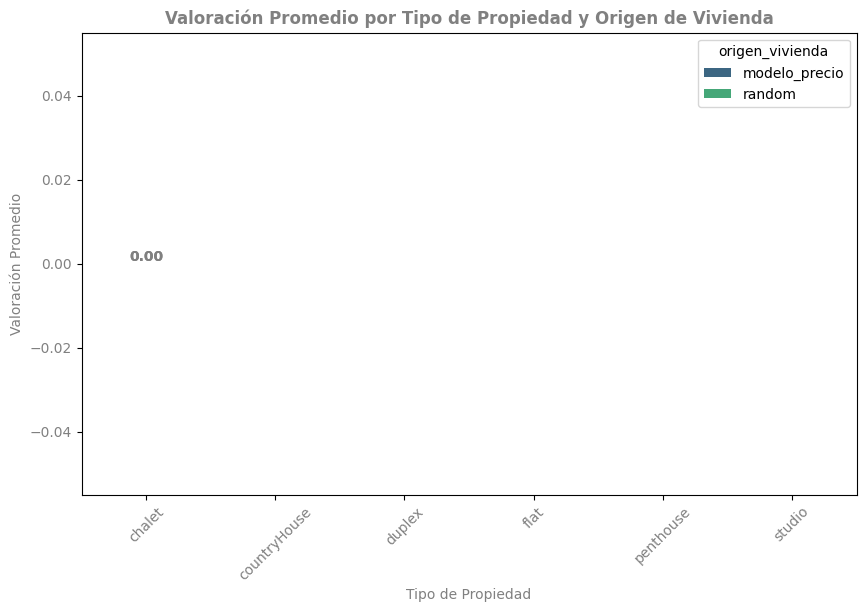

In [ ]:
#  Calculamos la media de las valoraciones por tipo de propiedad y origen de vivienda

valores = valoracion.groupby(['propertyType', 'origen_vivienda'])['Valoración'].mean().reset_index()

plt.figure(figsize=(10,6))

ax = sns.barplot(x='propertyType', y='Valoración', hue='origen_vivienda', data=valores, palette="viridis", width=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',   
                (p.get_x() + p.get_width()/2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray') 

plt.xlabel('Tipo de Propiedad', color='gray')
plt.ylabel('Valoración Promedio', color='gray')
plt.title('Valoración Promedio por Tipo de Propiedad y Origen de Vivienda', fontweight='bold', color='gray')

plt.xticks(rotation=45, color='gray') 
plt.yticks(color='gray')  

plt.show()


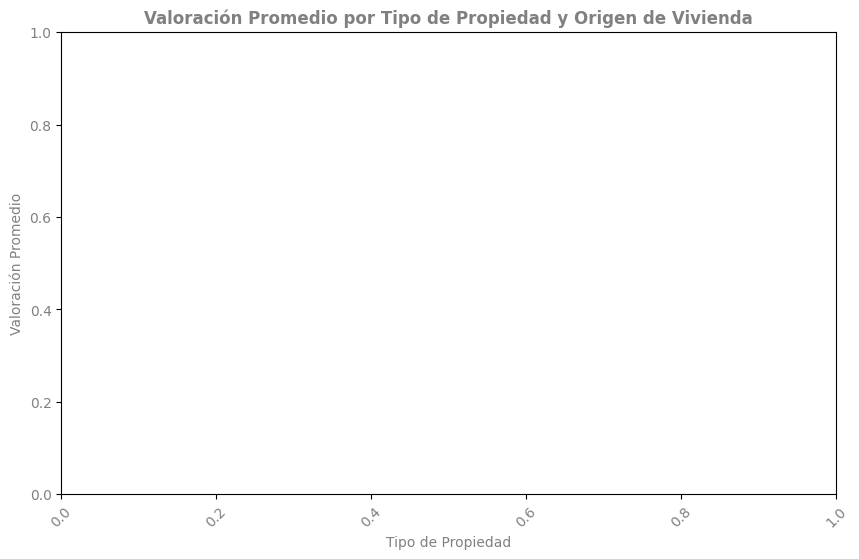

In [ ]:
# Calculamos la media de las valoraciones por barrio y origen de vivienda

valores = valoracion.groupby(['barrio', 'origen_vivienda'])['Valoración'].mean().reset_index().dropna(subset='Valoración')

plt.figure(figsize=(10,6))

ax = sns.barplot(x='barrio', y='Valoración', hue='origen_vivienda', data=valores, palette="viridis", width=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray')

plt.xlabel('Tipo de Propiedad', color='gray')
plt.ylabel('Valoración Promedio', color='gray')
plt.title('Valoración Promedio por Tipo de Propiedad y Origen de Vivienda', fontweight='bold', color='gray') 

plt.xticks(rotation=45, color='gray') 
plt.yticks(color='gray') 

plt.show()
